# Overview
Use this notebook to convert an OCT image you have to an H&E image in order to evaluate how the code works.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-UseModel/blob/main/ConvertOCTImagesToHistology.ipynb) and run.

## Notebook's Inputs:

In [ ]:
oct_input_image_path = "/content/drive/Shareddrives/Yolab - Current Projects/_Datasets/2020-11-10 10x Raw Data Used In Paper (Paper V2)/LG-19 - Slide04_Section02 (Fig 3.c)/OCTAligned.tiff"

In [ ]:
!git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-UseModel
%run /content/OCT2Hist-UseModel/setup_env.ipynb
from utils.show_images import *
from utils.crop import *

## Virtual oct2hist inputs (constants):

In [ ]:
#how many microns per pixel for each axis
microns_per_pixel_z = 1
microns_per_pixel_x = 1

# Path to a folder in drive to output the converted H&E images, leave blank if
# you don't want to save H&E image to drive.
histology_output_image_folder = ""

#pix2pix input sizes
VIRTUAL_HIST_WIDTH = 256
VIRTUAL_HIST_HEIGHT = 256
#verify input sizes
MICRONS_PER_PIXEL_Z_TARGET = 2
MICRONS_PER_PIXEL_X_TARGET = 4

## Preprocess
Mask images, crop and convert to the right size

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load OCT image
oct_image_orig = cv2.imread(oct_input_image_path)
oct_image_orig = cv2.cvtColor(oct_image_orig, cv2.COLOR_BGR2RGB)
oct_image = oct_image_orig.copy()
showImg(oct_image)

In [ ]:
#calculate the new image size to according to source and target micron/pixel rate.
new_image_width = int(oct_image.shape[1] * microns_per_pixel_x / MICRONS_PER_PIXEL_X_TARGET)
new_image_height = int(oct_image.shape[0] * microns_per_pixel_z / MICRONS_PER_PIXEL_Z_TARGET)

In [ ]:
from utils.masking import mask_image
masked_image, filt_img = mask_image(oct_image)

##visualize user input next to processed input

In [ ]:
from utils.crop import crop
cropped = crop(masked_image)
o2h_input = cv2.resize(cropped, [VIRTUAL_HIST_WIDTH,VIRTUAL_HIST_HEIGHT] , interpolation=cv2.INTER_AREA)
showTwoImgs(oct_image, o2h_input)

## Run Model

In [ ]:
%run oct2hist.ipynb
oct2hist_output_path = f"{base_folder}/results/pix2pix/test_latest/images/im1_fake_B.png"

## Show results

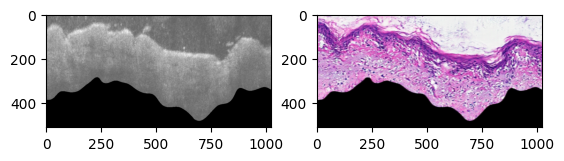

In [16]:
#visualize
height,width = cropped.shape[:2]
histology_image_resized = cv2.resize(histology_image, [width,height] , interpolation=cv2.INTER_AREA)
showTwoImgs(cropped, histology_image_resized)